In [50]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [53]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [54]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [55]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [56]:
df = df.drop('Patient ID', axis=1)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [57]:
#Separating the BP into systolic and diastolic
df['BP_systolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[0])
df['BP_diastolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[1])
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_systolic,BP_diastolic
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [58]:
df = df[['Age',
          # 'Sex', 
          'Cholesterol',
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 
        #  'Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 
      #  'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day',
        #  'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
df.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,158,88,72,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,389,165,93,98,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,324,174,99,72,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,383,163,100,73,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,318,91,88,93,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [59]:
df.dtypes

Age                                  int64
Cholesterol                          int64
BP_systolic                         object
BP_diastolic                        object
Heart Rate                           int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [60]:
df['BP_systolic'] = pd.to_numeric(df['BP_systolic'])
df['BP_diastolic'] = pd.to_numeric(df['BP_diastolic'])
df.dtypes

Age                                  int64
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [61]:
df.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,158,88,72,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,389,165,93,98,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,324,174,99,72,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,383,163,100,73,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,318,91,88,93,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [62]:
from sklearn.preprocessing import LabelEncoder
df.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,158,88,72,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,389,165,93,98,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,324,174,99,72,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,383,163,100,73,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,318,91,88,93,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [63]:
df3 = df.select_dtypes(include=['object'])
le = LabelEncoder()
label_encoder = {}
for column in df3:
    label_encoder[column] = le
    df3[column] = label_encoder[column].fit_transform(df[column])
df3.head()

,Diet
0,0
1,2
2,1
3,0
4,2


In [64]:
df = df[['Age',
          # 'Sex', 
          'Cholesterol',
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart Rate', 
        #  'Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 
      #  'Diet', 
       'Previous Heart Problems',
       'Medication Use', 
      #  'Stress Level', 'Sedentary Hours Per Day', 
      #  'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day',
        #  'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk']]
df.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Exercise Hours Per Week,Previous Heart Problems,Medication Use,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,158,88,72,4.168189,0,0,31.251233,286,0,6,0
1,21,389,165,93,98,1.813242,1,0,27.194973,235,1,7,0
2,21,324,174,99,72,2.078353,1,1,28.176571,587,4,4,0
3,84,383,163,100,73,9.828130,1,0,36.464704,378,3,4,0
4,66,318,91,88,93,5.804299,1,0,21.809144,231,1,5,0


In [65]:
result = pd.concat([df, df3], axis=1)

In [66]:
result.head()

,Age,Cholesterol,BP_systolic,BP_diastolic,Heart Rate,Exercise Hours Per Week,Previous Heart Problems,Medication Use,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Diet
0,67,208,158,88,72,4.168189,0,0,31.251233,286,0,6,0,0
1,21,389,165,93,98,1.813242,1,0,27.194973,235,1,7,0,2
2,21,324,174,99,72,2.078353,1,1,28.176571,587,4,4,0,1
3,84,383,163,100,73,9.828130,1,0,36.464704,378,3,4,0,0
4,66,318,91,88,93,5.804299,1,0,21.809144,231,1,5,0,2


In [67]:
result.dtypes

Age                                  int64
Cholesterol                          int64
BP_systolic                          int64
BP_diastolic                         int64
Heart Rate                           int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Diet                                 int32
dtype: object

In [68]:
!pip install imblearn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [71]:
result.columns

Index(['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'Diet'],
      dtype='object')

In [73]:
X = result[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart Rate',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
        'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
        'Diet']]
y = result[['Heart Attack Risk']]



In [74]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

In [75]:
X_resample.shape, y_resample.shape

((11248, 13), (11248, 1))

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y_resample, test_size=0.2, random_state=42)

In [78]:
classi = [
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['Support Vector Machines', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GradientBoostingClassifier', GradientBoostingClassifier()],
    ['AdaBoostClassifier', AdaBoostClassifier()],
    ['ExtraTreesClassifier', ExtraTreesClassifier()],
    ['K-Nearest Neighbors', KNeighborsClassifier()],
    ['XGBClassifier', XGBClassifier()]
]

resultsacc1 = []
resultsacc2 = []

for model in classi:
    name = model[0]
    mod = model[1]

    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = mod.score(X_train, y_train)
    acctes = mod.score(X_test, y_test)

    resultsacc1.append({'Model': name, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConv

In [79]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.334222,1.000000,0.665778
5,ExtraTreesClassifier,0.344444,1.000000,0.655556
7,XGBClassifier,0.360000,0.962103,0.640000
1,Support Vector Machines,0.386222,0.696377,0.613778
4,AdaBoostClassifier,0.394222,0.620693,0.605778
3,GradientBoostingClassifier,0.394667,0.669704,0.605333
6,K-Nearest Neighbors,0.400000,0.744388,0.600000
0,DecisionTreeClassifier,0.420889,1.000000,0.579111


In [80]:
results2_df

,Model,MeanSqauredError,RootMeanSquareError,MeanAbsoluteError
0,DecisionTreeClassifier,0.420889,0.648760,0.420889
1,Support Vector Machines,0.386222,0.621468,0.386222
2,RandomForestClassifier,0.334222,0.578120,0.334222
3,GradientBoostingClassifier,0.394667,0.628225,0.394667
4,AdaBoostClassifier,0.394222,0.627871,0.394222
5,ExtraTreesClassifier,0.344444,0.586894,0.344444
6,K-Nearest Neighbors,0.400000,0.632456,0.400000
7,XGBClassifier,0.360000,0.600000,0.360000


In [81]:
for key in classi:
    name = key[0]
    mod = key[1]
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    acc = accuracy_score(predictions, y_test)
    precision = precision_score(predictions, y_test)
    recall = recall_score(predictions, y_test)
    Y_predict = mod.predict(X_test)
    auc = roc_auc_score(y_test, y_test)
    print('Classification Report:',name)
    print(classification_report(y_test,predictions))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, predictions))

Classification Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1120
           1       0.58      0.60      0.59      1130

    accuracy                           0.58      2250
   macro avg       0.58      0.58      0.58      2250
weighted avg       0.58      0.58      0.58      2250

ROC_AUC_SCORE is 0.5772400442477876


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.61      0.65      0.62      1120
           1       0.62      0.58      0.60      1130

    accuracy                           0.61      2250
   macro avg       0.61      0.61      0.61      2250
weighted avg       0.61      0.61      0.61      2250

ROC_AUC_SCORE is 0.6139182996207333


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1120
           1       0.69      0.59      0.64      1130

    accuracy                           0.66      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.66      0.66      0.66      2250

ROC_AUC_SCORE is 0.6616308470290772


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1120
           1       0.61      0.61      0.61      1130

    accuracy                           0.60      2250
   macro avg       0.60      0.60      0.60      2250
weighted avg       0.60      0.60      0.60      2250

ROC_AUC_SCORE is 0.6048830594184578


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1120
           1       0.60      0.64      0.62      1130

    accuracy                           0.61      2250
   macro avg       0.61      0.61      0.61      2250
weighted avg       0.61      0.61      0.61      2250

ROC_AUC_SCORE is 0.6056257901390645


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1120
           1       0.67      0.62      0.64      1130

    accuracy                           0.66      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.66      0.66      0.66      2250

ROC_AUC_SCORE is 0.6579606510745891


c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      1120
           1       0.59      0.69      0.63      1130

    accuracy                           0.60      2250
   macro avg       0.60      0.60      0.60      2250
weighted avg       0.60      0.60      0.60      2250

ROC_AUC_SCORE is 0.5995930783817953
Classification Report: XGBClassifier
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1120
           1       0.64      0.64      0.64      1130

    accuracy                           0.64      2250
   macro avg       0.64      0.64      0.64      2250
weighted avg       0.64      0.64      0.64      2250

ROC_AUC_SCORE is 0.640016592920354


In [82]:
model = RandomForestClassifier(400 ,criterion="entropy")

In [83]:
model.fit(X_train,y_train)

c:\Users\manis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=400)

In [86]:
y_pred = model.predict(X_test)

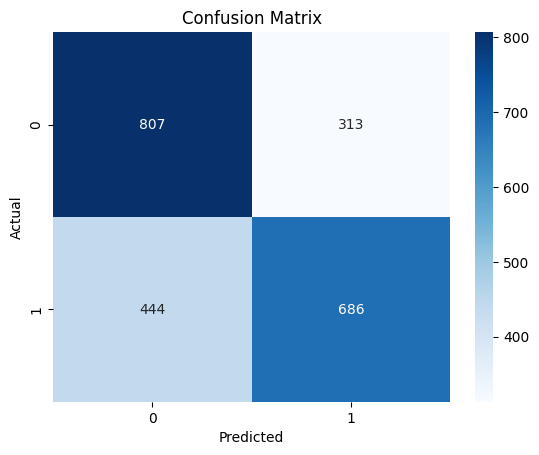

In [87]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

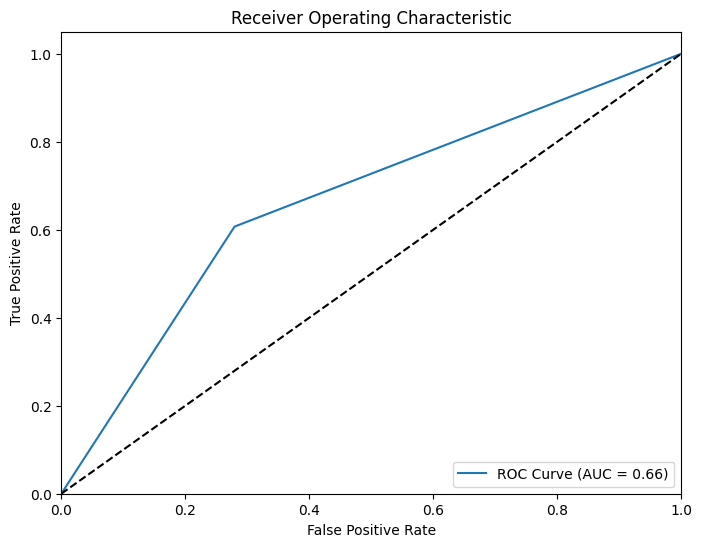

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [89]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [90]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []
    if predict_type > 0:
        if 'Smoking' in new_person and new_person['Smoking'] == 1:
            lifestyle_changes.append('quit smoking')
        if 'BMI' in new_person and new_person['BMI'] < 18.5:
            lifestyle_changes.append('gain weight')
        elif 'BMI' in new_person and new_person['BMI'] > 25:
            lifestyle_changes.append('lose weight')
        if 'Exercise Hours Per Week' in new_person and new_person['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('do more exercise')
        if 'Diet' in new_person and new_person['Diet'] == 0:
            lifestyle_changes.append('eat healthy food')
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('try reducing alcohol')
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Please {i},")
        print("This can reduce your heart rate risk.")

    if predict_type > 0.75:
        print("You should consult a doctor immediately.")
        print("Heart attack risk:", predict_type)

In [114]:
new_person = {'Age': 21, 'Cholesterol': 600, 'BP_systolic': 174, 'BP_diastolic': 99, 'Heart Rate': 90,
       'Diabetes': 1, 'Family History': 1, 'Smoking': 0, 'Obesity': 1,
       'Alcohol Consumption':1, 'Exercise Hours Per Week': 7,
       'Previous Heart Problems':0, 'Medication Use':1,
        'BMI': 22.17, 'Triglycerides': 180
       , 'Sleep Hours Per Day' : 8,
       'Sex': 0, 'Diet': 1}
new_person2 = {'Age': 86, 'Cholesterol': 700, 'BP_systolic': 184, 'BP_diastolic': 109, 'Heart Rate': 90,
        'Exercise Hours Per Week': 7,
       'Previous Heart Problems':0, 'Medication Use':1,
       
        'BMI': 22.17, 'Triglycerides': 180, 'Physical Activity Days Per Week':2
       , 'Sleep Hours Per Day' : 8, 'Diet': 1}

dict1 = pd.DataFrame([new_person2])
x = dicti_vals(new_person2)
x

array([[ 86.  , 700.  , 184.  , 109.  ,  90.  ,   7.  ,   0.  ,   1.  ,
         22.17, 180.  ,   2.  ,   8.  ,   1.  ]])

In [115]:
def result(predict_type, model):
    lifestyle_changes = []
    if predict_type > 0.5:
        if 'Smoking' in model:
            print("x")
        lifestyle_changes = ["quit smoking", "lose weight", "exercise more", "eat a healthy diet"]

    if predict_type > 0.75:
        print("You should consult a doctor immediately.")

    print("Heart attack risk:", predict_type)
    print("Lifestyle changes:", lifestyle_changes)

In [116]:
model.predict(x)

array([0], dtype=int64)

In [117]:
predict_type = model.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Heart attack risk: [0.4625]
Please try reducing alcohol,
This can reduce your heart rate risk.


In [118]:
import pickle

In [119]:
data = {"model": model}
with open('saved_steps66.pkl', 'wb') as file:
    pickle.dump(data, file)